In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading the data.

df_hr = pd.read_csv("HR-Employee-Attrition.csv")
df_hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

The dataset contains 1470 rows and 35 columns. It contains both numerical as well as categorical data. The target variable is "Attrition" with attributes "Yes" and "No".

In [4]:
df_hr.shape

(1470, 35)

In [5]:
# Checking the data types  of each feature.

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [3]:
# Dropping the "EmployeeCount" and "StandardHours" because they are not contributing in the dataset.

df_hr = df_hr.drop(['EmployeeCount', 'StandardHours'], axis=1)

There are 9 features having "object" datatype and 26 featues having "int64" datatype.

In [6]:
# Let's use the describe function to check the statistical summary of the dataset.

df_hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

OBSERVATIONS :

1. Median of "Education", "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "RelationshipSatisfaction", "StockOptionLevel", "TrainingTimesLastYear" and "WorkLifeBalance" is more than the mean..
2. The range of features except for "Age", "DailyRate" and "EmployeeNumber" is between 0-29.
3. There are some outliers present in the dataset eg. being "YearsSinceLastPromotion" and "YearsWithCurrManager".
4. "EmployeeCount" and "StandardHours" is having the same value. Thus, showing that these 2 features are not not contributing in the dataset to predict the target variable.

In [8]:
# Let's check the null values.

df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

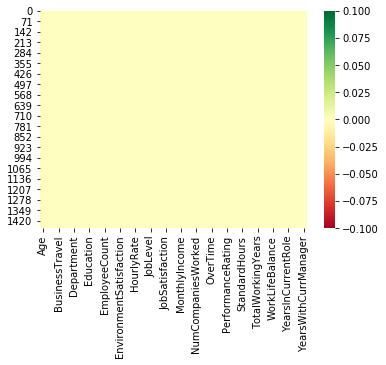

In [9]:
# Visualizationn of null values using heatmap.

sns.heatmap(df_hr.isnull(), cmap = "RdYlGn") 

Thus, from above , it is clear that there are no null values present in the dataset.

In [11]:
# Let's see the correlation.

df_hr.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

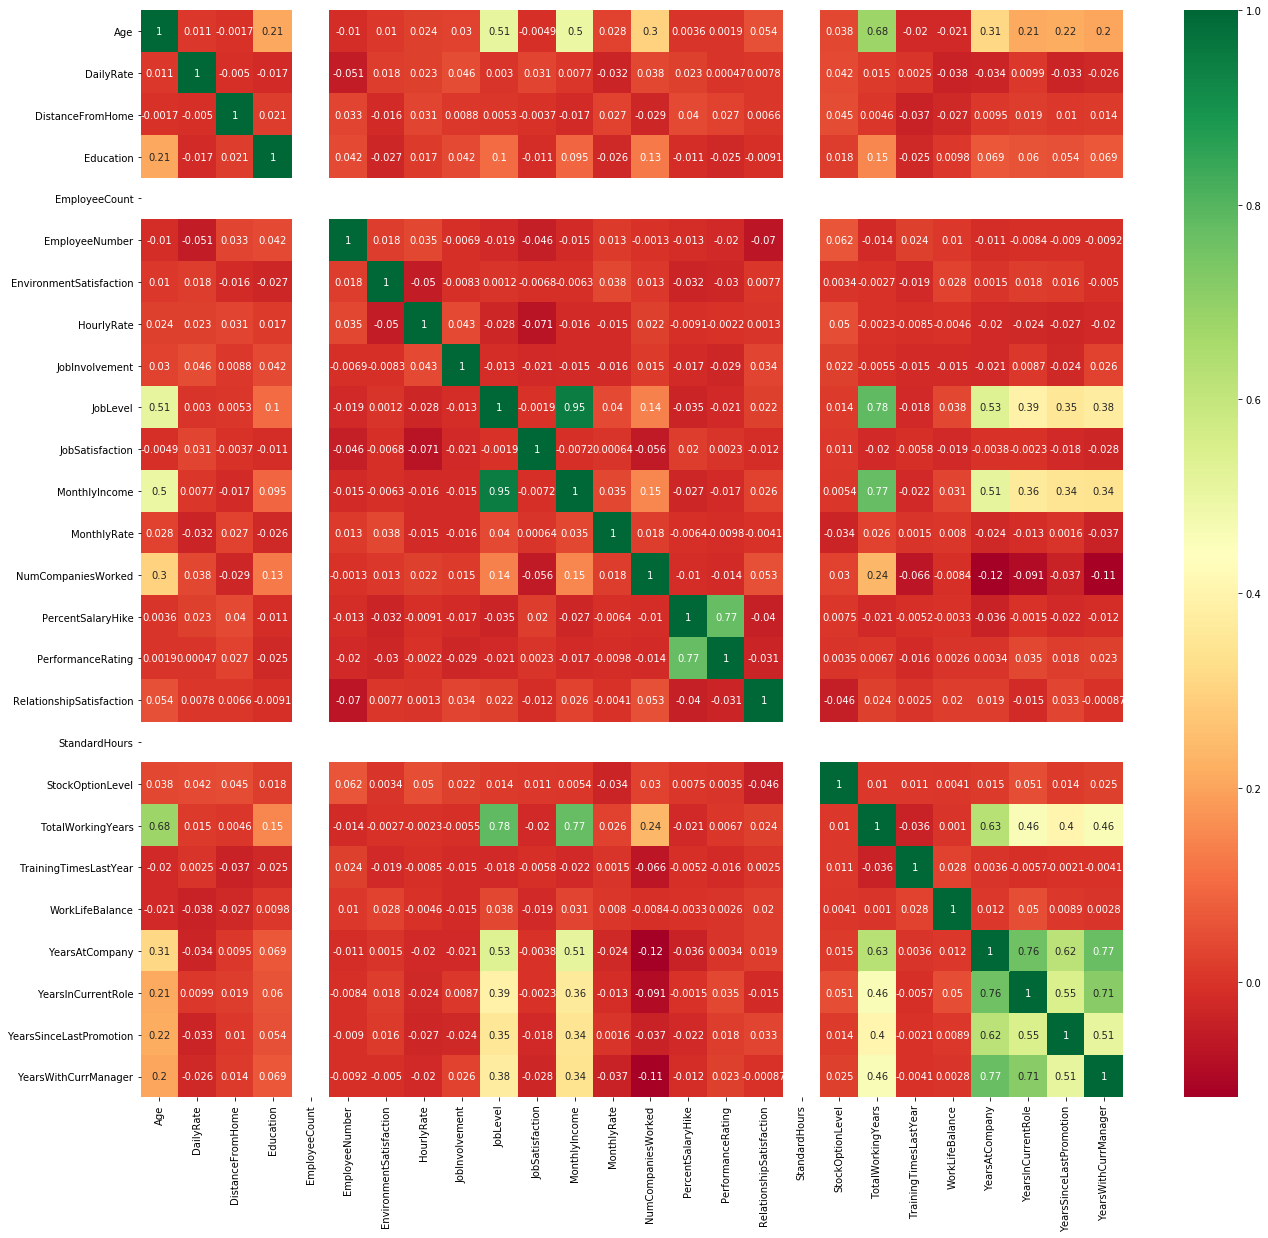

In [12]:
# Visualizing the correlation amaong the variables.

plt.figure(figsize=(22,20))
sns.heatmap(df_hr.corr(), cmap= "RdYlGn", annot= True)

OBSERVATIONS :

1. "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion" and "YearsWithCurrManager" having a good positive correlation.
2. "JobLevel" and "MonthlyIncome" are having a positive correlation with most of the variables. As if a employee isfom many years in the company than he/she will be having a good job level and also belonging to the higher age.
3. "PerformanceRating" is highly related to "PercentSalaryHike" which is obvious that if the performance is good  then there will be a chances of hike in salary.
4. "TotalWorkingYears" is highly related to "JobLevel".
5. The "StandardHours" and "EmployeeNumber" are blank as they are not contributing so there isno correlation with any of the variable.

In [13]:
df_hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

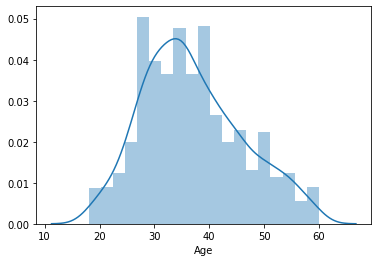

In [14]:
sns.distplot(df_hr['Age'])

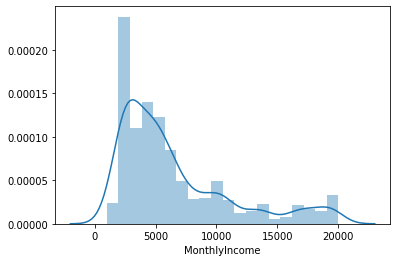

In [15]:
sns.distplot(df_hr['MonthlyIncome'])

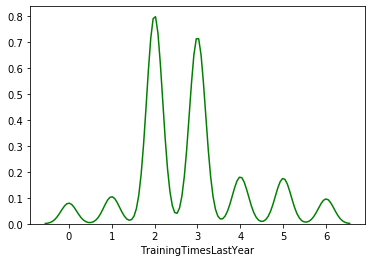

In [16]:
sns.distplot(df_hr['TrainingTimesLastYear'],hist=False, color='g')

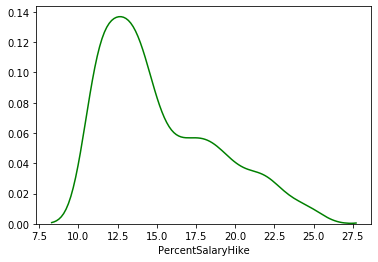

In [17]:
sns.distplot(df_hr['PercentSalaryHike'],hist=False, color='g')

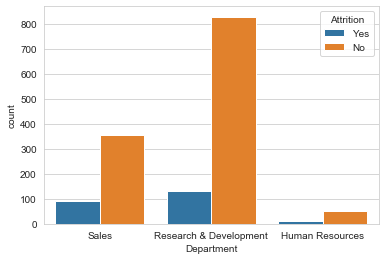

In [18]:
sns.set_style('whitegrid')
a = sns.countplot(x="Department",hue="Attrition",data=df_hr)
plt.show()

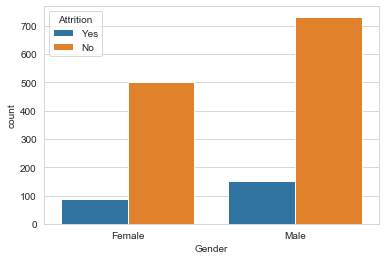

In [19]:
a = sns.countplot(x="Gender",hue="Attrition",data=df_hr)

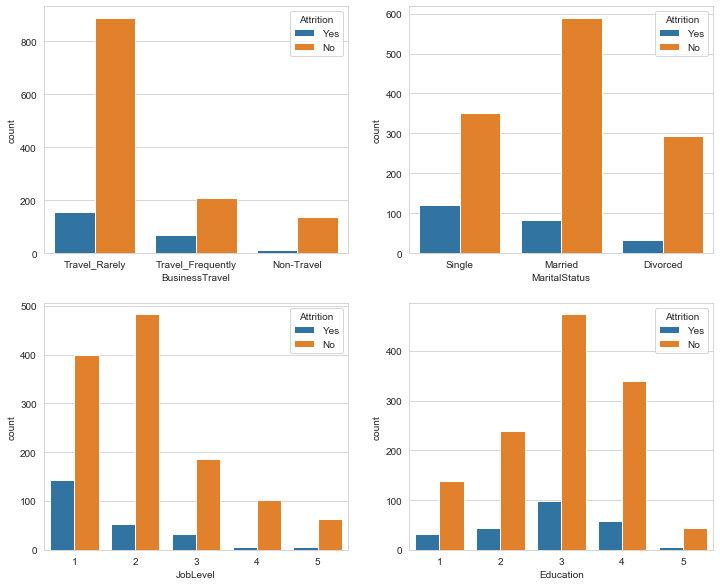

In [20]:
fig,ax = plt.subplots(2,2, figsize=(12,10))               
sns.countplot(x="BusinessTravel",hue="Attrition",data=df_hr, ax = ax[0,0]) 
sns.countplot(x="MaritalStatus",hue="Attrition",data=df_hr, ax = ax[0,1]) 
sns.countplot(x="JobLevel",hue="Attrition",data=df_hr, ax = ax[1,0]) 
sns.countplot(x="Education",hue="Attrition",data=df_hr, ax = ax[1,1]) 
plt.show()

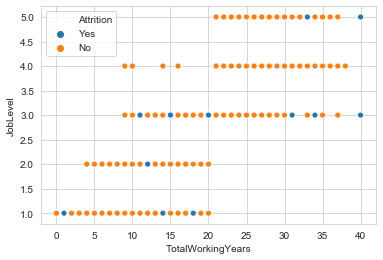

In [21]:
a = sns.scatterplot(x="TotalWorkingYears",y="JobLevel",hue="Attrition",data=df_hr)
plt.show()

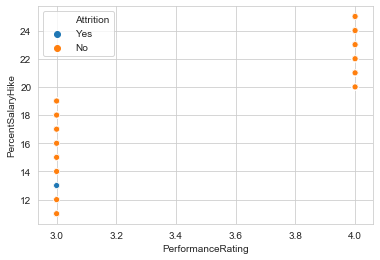

In [22]:
a = sns.scatterplot(x="PerformanceRating",y="PercentSalaryHike",hue="Attrition",data=df_hr)
plt.show()

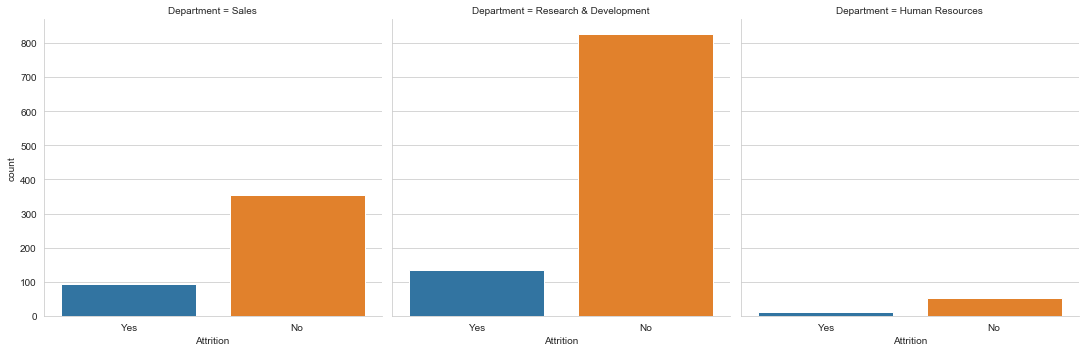

In [23]:
sns.factorplot(data=df_hr,kind='count',x='Attrition',col='Department')

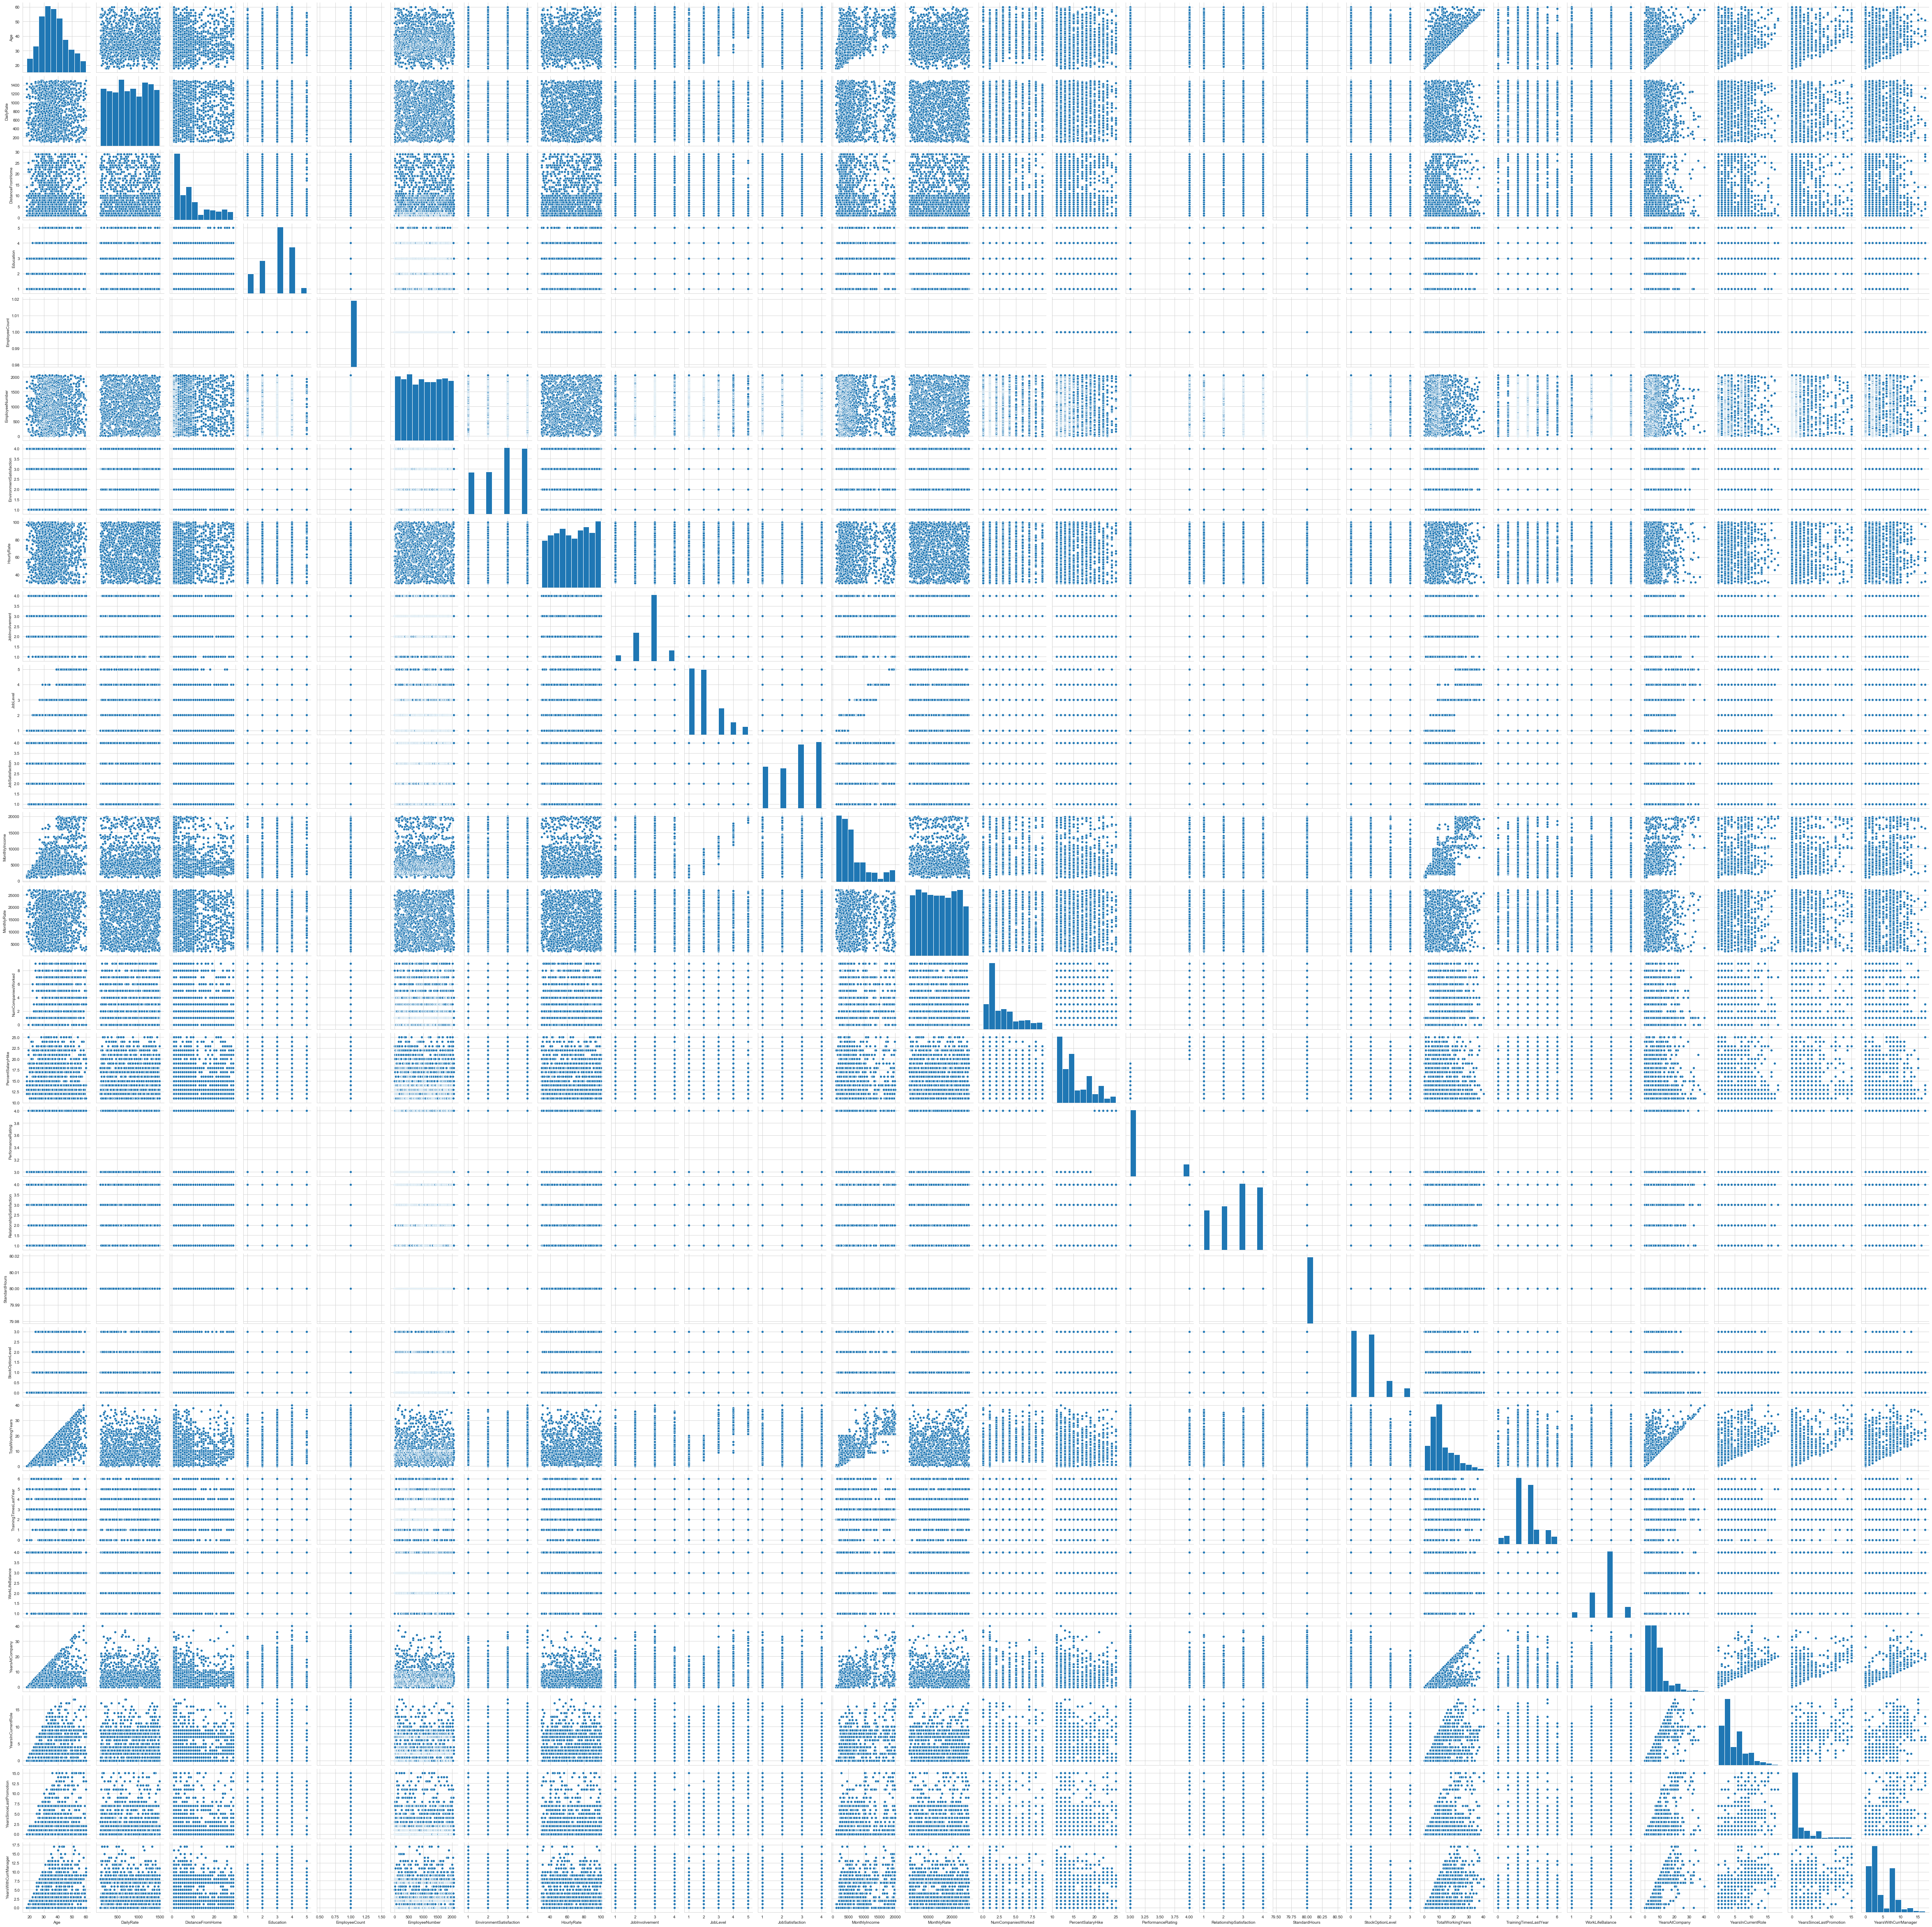

In [24]:
sns.pairplot(df_hr)

In [25]:
# Dropping the "EmployeeCount" and "StandardHours" because they are not contributing in the dataset.

df_hr = df_hr.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [4]:
df_hr.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
4                 2          1        Medical               7   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        2  ...                 3                         1   
1                        3  ...                 4                         4   
2                        4  ...                 3                         2   
3                        4  ...                 3                         3   
4                        1  ...                 3                         4   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 33 columns]

In [26]:
# Replacing the target variable :
# 0 = Yes and 1 = No.
# Checking the value counts after replacing.

df_hr['Attrition'] = df_hr.Attrition.replace({"Yes":0, "No":1})
df_hr.Attrition.value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

In [27]:
# Let's  make a list of numerical data.

hr_num = df_hr.select_dtypes(exclude='object')
hr_num.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          0       1102                 1          2               1   
1   49          1        279                 8          1               2   
2   37          0       1373                 2          2               4   
3   33          1       1392                 3          4               5   
4   27          1        591                 2          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 25 columns]

In [28]:
# Let's  make a list of categorical data.

hr_cat = df_hr.select_dtypes(include='object')
hr_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [29]:
# Creating the dummies for the categorical columns.

hr_cat_final = pd.get_dummies(hr_cat,drop_first=True)
hr_cat_final.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0   

   EducationField_Technical Degree  Gender_Male  ...  \
0                                0            0  ...   
1                                0            1  ...   
2                                0            1  ...   
3                                0            0  ...   
4                                0            1  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 21 columns]

In [30]:
# Concatinating the dummie variables with numerical column and making a final clolumn list.

df_hr = pd.concat([hr_num,hr_cat_final], axis = 1)
df_hr.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          0       1102                 1          2               1   
1   49          1        279                 8          1               2   
2   37          0       1373                 2          2               4   
3   33          1       1392                 3          4               5   
4   27          1        591                 2          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                             0                      0                     1   
1                             0                      1                     0   
2                             0                      0                     1   
3                             0                      1                     0   
4                             0                      1                     0   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 46 columns]

In [31]:
# Lets check the skewness of dataset.
df_hr.skew()

Age                                  0.413286
Attrition                           -1.844366
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EmployeeNumber                       0.016574
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                    

In [32]:
for col in df_hr.columns:
    if df_hr.skew().loc[col]>0.55:
        df_hr[col]=np.sqrt(df_hr[col])

In [33]:
df_hr.skew()

Age                                  0.413286
Attrition                           -1.844366
DailyRate                           -0.003519
DistanceFromHome                     0.398114
Education                           -0.289681
EmployeeNumber                       0.016574
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             0.593923
JobSatisfaction                     -0.329672
MonthlyIncome                        0.861960
MonthlyRate                          0.018578
NumCompaniesWorked                   0.031303
PercentSalaryHike                    0.655412
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.057528
TotalWorkingYears                    0.176358
TrainingTimesLastYear               -1.216268
WorkLifeBalance                     -0.552480
YearsAtCompany                    

In [34]:
# Let's now check the outliers and clean the data.

z = np.abs(zscore(df_hr))
print(z.shape)
df_hr = df_hr.loc[(z<3).all(axis=1)]
print(df_hr.shape)

(1470, 46)
(816, 46)


By comparing shape of 'z' and 'df_hr' shape , 654 rows have been removed as  outliers.

The data cleaning is done.

In [35]:
# Separating the input and target variables

X =df_hr.drop(columns=["Attrition"])
y =df_hr[["Attrition"]]

In [36]:
print(X.shape)
print(y.shape)

(816, 45)
(816, 1)


In [37]:
X.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
1   49        279          2.828427          1               2   
3   33       1392          1.732051          4               5   
4   27        591          1.414214          1               7   
5   32       1005          1.414214          2               8   
6   59       1324          1.732051          3              10   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1                        3          61               2  1.414214   
3                        4          56               3  1.000000   
4                        1          40               3  1.000000   
5                        4          79               3  1.000000   
6                        3          81               4  1.000000   

   JobSatisfaction  ...  JobRole_Laboratory Technician  JobRole_Manager  \
1                2  ...                            0.0              0.0   
3                3  ...                            0.0              0.0   
4                2  ...                            1.0              0.0   
5                4  ...                            1.0              0.0   
6                1  ...                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
1                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   
5                             0.0                        0.0   
6                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
1                         1.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   
5                         0.0                      0.0   
6                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
1                           0.0                      1                   0.0   
3                           0.0                      1                   0.0   
4                           0.0                      1                   0.0   
5                           0.0                      0                   1.0   
6                           0.0                      1                   0.0   

   OverTime_Yes  
1           0.0  
3           1.0  
4           0.0  
5           0.0  
6           1.0  

[5 rows x 45 columns]

In [38]:
y.head()

Attrition
1          1
3          1
4          1
5          1
6          1

In [39]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.55220897, -1.30064107,  0.03148033, ...,  1.10335457,
        -0.69932188, -0.63218427],
       [-0.33965439,  1.44719294, -0.78609688, ...,  1.10335457,
        -0.69932188,  1.58181728],
       [-1.04910315, -0.53035876, -1.02311084, ...,  1.10335457,
        -0.69932188, -0.63218427],
       ...,
       [ 0.36979437, -0.47604398, -0.25109652, ...,  1.10335457,
        -0.69932188, -0.63218427],
       [ 1.55220897,  0.53618598, -1.02311084, ...,  1.10335457,
        -0.69932188, -0.63218427],
       [-0.22141293, -0.43901118,  0.03148033, ...,  1.10335457,
        -0.69932188, -0.63218427]])

In [40]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum accuracy score corresponding to", final_r_state, "is :", max_acc_scr)
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)    

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [45]:
print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, X, y)
print("\n")

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, X, y)
print("\n")

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)
print("\n")

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)
print("\n")

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)

-------Logistic Regression-------
Maximum accuracy score corresponding to 85 is : 0.9329268292682927


Confusion Matrix :
 [[  6   9]
 [ 15 134]]


Classification Report :
               precision    recall  f1-score   support

           0       0.29      0.40      0.33        15
           1       0.94      0.90      0.92       149

    accuracy                           0.85       164
   macro avg       0.61      0.65      0.63       164
weighted avg       0.88      0.85      0.86       164



ROC_AUC_CURVE : 0.6496644295302014


-------GaussianNB-------
Maximum accuracy score corresponding to 85 is : 0.926829268292683


Confusion Matrix :
 [[  8  18]
 [ 13 125]]


Classification Report :
               precision    recall  f1-score   support

           0       0.38      0.31      0.34        26
           1       0.87      0.91      0.89       138

    accuracy                           0.81       164
   macro avg       0.63      0.61      0.62       164
weighted avg       0.80   

In [46]:
print("-------Cross Validation of Logistic Regression-------")
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of GaussianNB-------")
print("Cross validation score :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(gnb, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of DecisionTreeClassifier-------")
print("Cross validation score :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(dtc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of SVC-------")
print("Cross validation score :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(sv, X, y, cv=5, scoring = "accuracy").std())
print("\n")

print("-------Cross Validation of KNeighborsClassifier-------")
print("Cross validation score :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").std())

-------Cross Validation of Logistic Regression-------
Cross validation score : 0.8676567409845877
Standard Deviationscore : 0.01619052037741589


-------Cross Validation of GaussianNB-------
Cross validation score : 0.8443438575490049
Standard Deviationscore : 0.0282327136228503


-------Cross Validation of DecisionTreeClassifier-------
Cross validation score : 0.7660107736046685
Standard Deviationscore : 0.030092969094947217


-------Cross Validation of SVC-------
Cross validation score : 0.8566362412090379
Standard Deviationscore : 0.015616049988385963


-------Cross Validation of KNeighborsClassifier-------
Cross validation score : 0.8455932964237618
Standard Deviationscore : 0.004395352130066295


Thus selecting the logistic regression as it is giving the best result out of the models used.

In [47]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(lr, 'lr_hr_attrition.pkl')

['lr_hr_attrition.pkl']